#### Pyber Homework
Analysis
1. The total number of drivers is very high in Urban areas
2. The total number of drivers and total number of rides in rural area is very low
3. Drivers in suburban and rural areas earn high fares



In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing the files
city_df= pd.read_csv("D:\\Data_Science\\GW-DataAnalytics\\HomeWork\\matplotlib\\city_data.csv")
ride_df=pd.read_csv("D:\\Data_Science\\GW-DataAnalytics\\HomeWork\\matplotlib\\ride_data.csv")

In [4]:
#checking the top five rows of ride data frame
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#checking the top five rows of city data frame
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [11]:
#Merging the city and ride data frames
city_ride=pd.merge(ride_df,city_df,how="left",on="city")

In [12]:
#checking overall information of the city_ride data frame
city_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 0 to 2406
Data columns (total 6 columns):
city            2407 non-null object
date            2407 non-null object
fare            2407 non-null float64
ride_id         2407 non-null int64
driver_count    2407 non-null int64
type            2407 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 131.6+ KB


In [13]:
#checking the head of city_ride_dataframe
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


### Bubble plot of ride sharing data

In [14]:
#grouping the city_ride data frame by city & aggregate function is used
city_ride_group= city_ride.groupby("city",as_index=False).agg({"fare":"mean","ride_id":"count",
                                                               "driver_count":"first","type":"first"})

In [15]:
city_ride_group.head()

,city,fare,ride_id,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [25]:
#Renaming columns of the grouped data frame city_ride_group
city_ride_renamed=city_ride_group.rename(columns={"city":"City","fare":"Average Fare","ride_id":"Ride_Count",
                                "driver_count":"Driver Count","type":"Type"})

In [26]:
city_ride_renamed.columns

Index(['City', 'Average Fare', 'Ride_Count', 'Driver Count', 'Type'], dtype='object')

In [95]:
#creating a Color dictionary 
color_dict={"Urban":"lightcoral","Suburban":"lightskyblue","Rural":"gold"}

In [114]:
#ploting the bubble plot using Ride Count as x_axis,Average Fare as Y_axis and Driver count as 
#size and is multiplied by 10 for best size proportion
plt.scatter(city_ride_renamed["Ride_Count"],city_ride_renamed["Average Fare"],
            s=city_ride_renamed["Driver Count"]*10,color=[color_dict.get(x) for x in city_ride_renamed["Type"]],alpha=0.5,edgecolors="black")

In [115]:
#Adding labels,title,x&y limit and grid to the bubble plot
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlim(0,40)
plt.ylim(15,45)
plt.grid()

In [116]:
#adding legend to the bubble plot
plt.legend(["Urban","Suburban","Rural"],loc="upper right")

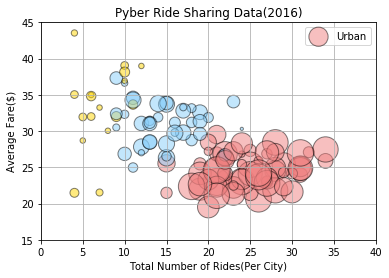

In [117]:
#showing the final plot
plt.show()

### Total Fares by city type

In [79]:
#grouping the city ride data frame with type 
city_ride_type=city_ride.groupby("type",
                                 as_index=False).agg({"fare":"sum",
                                "ride_id":"count","driver_count":"sum"})

In [80]:
city_ride_type.head()

,type,fare,ride_id,driver_count
0,Rural,4255.09,125,727
1,Suburban,20335.69,657,9730
2,Urban,40078.34,1625,64501


In [81]:
#Renaming columns of the grouped data frame city_ride_group
city_ride_type_re=city_ride_type.rename(columns={"type":"Type","fare":"Total Fare","ride_id":"Total Rides",
                                "driver_count":"Total Drivers"})

In [82]:
city_ride_type_re.head()

,Type,Total Fare,Total Rides,Total Drivers
0,Rural,4255.09,125,727
1,Suburban,20335.69,657,9730
2,Urban,40078.34,1625,64501


In [83]:
#assigning color and explode for the pie chart
color=("gold","lightskyblue","lightcoral")
explode=(0.1,0.1,0)

In [84]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_ride_type_re["Total Fare"], labels=city_ride_type_re["Type"], explode=explode,colors=color,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1e22b8a4278>,
  <matplotlib.text.Text at 0x1e22b919b00>])

In [85]:
plt.title("%of Total Fares by City Type")

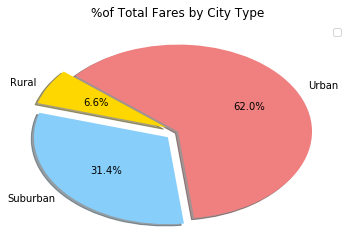

In [86]:
plt.show()

### Total Rides by City Type

In [88]:
# create a pie chart based upon the city_ride_type_re data frame 
plt.pie(city_ride_type_re["Total Rides"], labels=city_ride_type_re["Type"], explode=explode,colors=color, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1e22b9ad8d0>,
  <matplotlib.text.Text at 0x1e22b9cbb70>])

In [89]:
#Setting up title for the pie chart
plt.title("%of Total Rides by City Type")

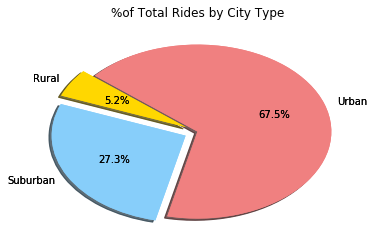

In [90]:
#showing the total rides by city type pie chart
plt.show()

### Total Drivers by City Type

In [91]:
# creating  a pie chart based upon the percentage of the total drivers in a city
plt.pie(city_ride_type_re["Total Drivers"], labels=city_ride_type_re["Type"], explode=explode,colors=color, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1e22ba3f240>,
  <matplotlib.text.Text at 0x1e22ba61748>])

In [92]:
#assigning title for the pie chart
plt.title("%Total drivers by City Type")

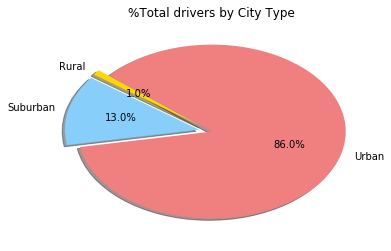

In [93]:
#Displaying the percentage of totaldrivers by city type pie chart
plt.show()